In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Importing the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('data.csv',
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)
dataset = dataset[['sentiment','text']]
dataset['sentiment'] = dataset['sentiment'].replace(4,1)
dataset

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


<AxesSubplot:xlabel='sentiment', ylabel='count'>

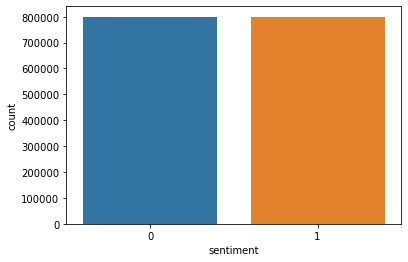

In [3]:
sns.countplot(dataset['sentiment'])

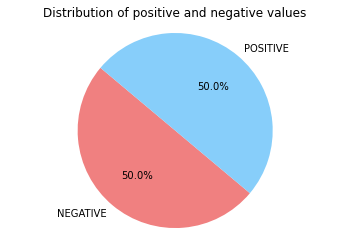

In [4]:
counts = dataset['sentiment'].value_counts()
labels = ['NEGATIVE','POSITIVE']
colors = ['lightcoral', 'lightskyblue']
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of positive and negative values')
plt.show()

In [5]:
data = pd.read_csv('finalSentimentdata2.csv')
data['sentiment']=data['sentiment'].replace({'sad':0,'joy':1,'anger':0,'fear':0})

In [6]:
f_data = [dataset,data]
dataset = pd.concat(f_data)
dataset

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
3085,0,today at 02 30pm a 54 year old bangladeshi mal...
3086,0,corona virus i implore that you cease activity...
3087,1,issa date once lockdown ends inshaallah (and c...
3088,0,the death toll due to covid 19 rose to 31 in j...


<AxesSubplot:xlabel='sentiment', ylabel='count'>

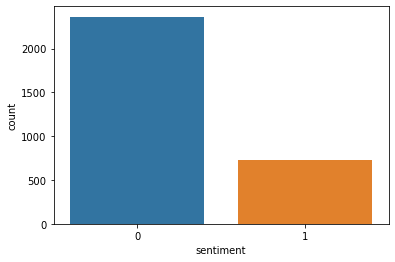

In [7]:
sns.countplot(data['sentiment'])

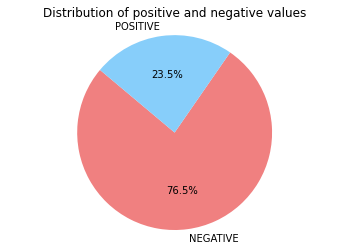

In [8]:
counts = data['sentiment'].value_counts()
labels = ['NEGATIVE','POSITIVE']
colors = ['lightcoral', 'lightskyblue']
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of positive and negative values')
plt.show()

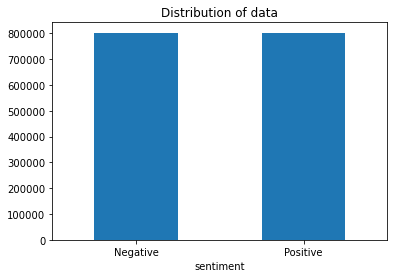

In [9]:
# Plotting the distribution for dataset.
ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

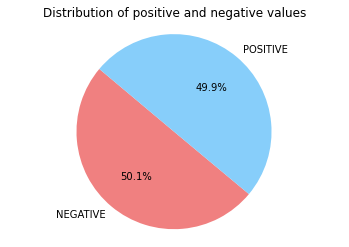

In [10]:
counts = dataset['sentiment'].value_counts()
labels = ['NEGATIVE','POSITIVE']
colors = ['lightcoral', 'lightskyblue']
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of positive and negative values')
plt.show()

In [11]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

from nltk.corpus import stopwords
stopwordlist = stopwords.words('english')

In [12]:
def preprocess(textdata):
    processedText = []
    wordLemm = WordNetLemmatizer()
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        tweet = re.sub(urlPattern,' URL',tweet)
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        tweet = re.sub(userPattern,' USER', tweet)        
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [13]:
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')

Text Preprocessing complete.


In [14]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,
                                                    test_size = 0.2, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [15]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=600000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

Vectoriser fitted.
No. of feature_words:  600000


In [16]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [17]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
y_pred = LRmodel.predict(X_test)
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82    160622
           1       0.82      0.83      0.83    159996

    accuracy                           0.83    320618
   macro avg       0.83      0.83      0.83    320618
weighted avg       0.83      0.83      0.83    320618

[[131284  29338]
 [ 26760 133236]]


<AxesSubplot:>

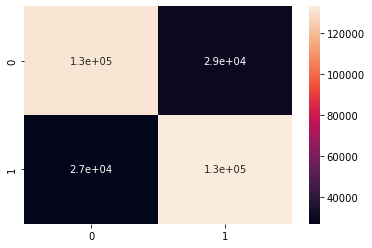

In [18]:
sns.heatmap(cf_matrix,annot=True)

In [19]:
your_text = input("enter your tweet: ")
sample_data = []
sample_data.append(your_text)
textdata = vectoriser.transform(preprocess(sample_data))
sentiment = LRmodel.predict(textdata)
data = []
data.append((your_text,sentiment))
df = pd.DataFrame(data, columns = ['text','sentiment'])
df = df.replace([0,1], ["Negative","Positive"])
print(df)

enter your tweet: its a good day.
              text sentiment
0  its a good day.  Positive
